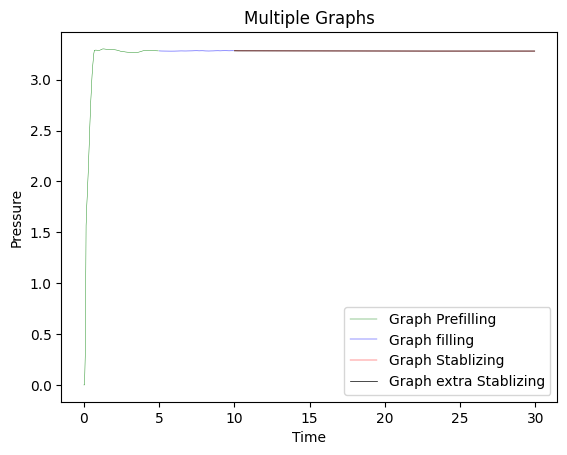

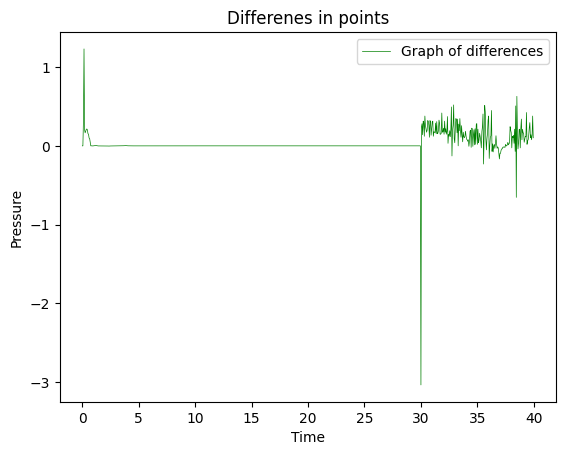

In [1]:

import csv 
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


Data = []

with open ('okay1.txt') as f:
    reader_obj = csv.reader(f) 
      
    # Iterate over each row in the csv  
    # file using reader object 
    for row in reader_obj:

    # Load data into DataFrame
        Data.append(row)
# Data.remove([0])
# print(Data[0])
# res = list(filter(None, Data))
        
# print(Data[:1000])
# fcsv = []
# for data in Data:
#     t = data[0].split(',')
#     fcsv.append(t)
csd = []
for l in Data:
    if len(l) == 6:
        # csd.append([l[2],l[3],l[5]])
        if l[2] == "PRF" or l[2] == "FGN" or l[2] == "SDP" or l[2] == "DPD":
            csd.append([l[2],float(l[3].split()[1]),float(l[5].split()[1])])
        

# for d in range(1000):
#     print(csd[d])

Prf = []
Flg = []
Stb = []
Dpd = []

empty = []

i = 0
for d in csd:
    if d == ['PRF', 0.0, 0.0]:
        empty.append(i)
    i += 1
f = empty[0]
sec = empty[1]

csd = csd[f:sec]


for d in csd:
    if d[0] == "PRF":
        Prf.append([d[1],d[2]])
    elif d[0] == "FGN":
        Flg.append([d[1],d[2]])
    elif d[0] == "SDP":
        Stb.append([d[1],d[2]])
    else:
        Dpd.append([d[1],d[2]])
Final = Prf+Flg+Stb+Dpd
# print(Prf)
# print(Flg)
# print(Stb)
# print(Dpd)

columns = ['Elapse_Time', 'Pressure']
Pdf = pd.DataFrame(Prf, columns=columns)
Fdf = pd.DataFrame(Flg, columns=columns)
Sdf = pd.DataFrame(Stb, columns=columns)
Ddf = pd.DataFrame(Stb, columns=columns)

# print(Pdf)
# print(Fdf)
# print(Sdf)
# print(Ddf)

M_prf = Pdf['Pressure'].mean()
SD_prf = Pdf['Pressure'].std()

M_frf = Fdf['Pressure'].mean()
SD_frf = Fdf['Pressure'].std()

M_sdf = Sdf['Pressure'].mean()
SD_sdf = Sdf['Pressure'].std()

M_ddf = Ddf['Pressure'].mean()
SD_ddf = Ddf['Pressure'].std()

print(M_prf,SD_prf, '\n',M_frf,SD_frf,'\n',M_sdf,SD_sdf, '\n', M_ddf,  SD_ddf)

##   Plot

plt.plot(Pdf['Elapse_Time'], Pdf['Pressure'],
             label=f'Graph Prefilling', color='green', linewidth=0.3)
plt.plot(Fdf['Elapse_Time'], Fdf['Pressure'],
             label=f'Graph filling', color='blue', linewidth=0.3)
plt.plot(Sdf['Elapse_Time'], Sdf['Pressure'],
             label=f'Graph Stablizing', color='red', linewidth=0.3)
plt.plot(Ddf['Elapse_Time'], Ddf['Pressure'],
             label=f'Graph extra Stablizing', color='black', linewidth=0.5)
# Add labels and title
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Multiple Graphs')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Calculate differences between consecutive elements of the second column
differences = [Final[i][1] - Final[i-1][1] for i in range(1, len(Final))]

# Handle the case where the original list has only one element

    # Create a new list of lists with the first column same as original and second column containing differences
new_list = [[Final[i][0], differences[i-1]] for i in range(1, len(Final))]

# Add the last element of the original list to the new list
new_list.insert(0,[0.0, 0.0])


# print(new_list)



# Diff_list = []
# l = len(differences)
# for i in range(0,l):
    
#     Diff_list.append([csd[i][1],differences[i]])


# Oldpd = pd.DataFrame(csd,columns=['Steps', 'Elapse_Time', 'Pressure'])
Newpd = pd.DataFrame(new_list,columns=columns)

# print(Oldpd)
# print(Newpd)


# print("Top five maximum differences and their indices:")
# for index, diff in max_diff_indices:
#     print("Index:", index + 1, ", Difference:", diff,", Time", csd[index][1])


###   Plotting the differences

#   Plot

plt.plot(Newpd['Elapse_Time'], Newpd['Pressure'],
             label=f'Graph of differences', color='green', linewidth=0.5)

plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Differenes in points')

# Add legend
plt.legend()

# Show the plot
plt.show() 



        


